In [8]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [9]:
class AgentState(TypedDict):
  num1:int
  num2:int
  num3:int
  num4:int
  operation1:str
  operation2:str
  out1:int
  out2:int

In [10]:
def adder1(state:AgentState)->AgentState:
  """ Adds num1 and num2 and stores in out1"""
  state['out1']=state['num1']+state['num2']
  return state

def adder2(state:AgentState)->AgentState:
  """ Adds num3 and num4 and stores in out2"""
  state['out2']=state['num3']+state['num4']
  return state

def subtractor1(state:AgentState)->AgentState:
  """ Subtracts num1 and num2 and stores in out1"""
  state['out1']=state['num1']-state['num2']
  return state

def subtractor2(state:AgentState)->AgentState:
  """ Subtracts num3 and num4 and stores in out2"""
  state['out2']=state['num3']-state['num4']
  return state

def router1(state:AgentState)->str:
  if(state['operation1'] == "+"):
    return "addition_operation1"
  if(state['operation1'] == "-"):
    return "subtraction_operation1"

def router2(state:AgentState)->str:
  if(state['operation2'] == "+"):
    return "addition_operation2"
  if(state['operation2'] == "-"):
    return "subtraction_operation2"


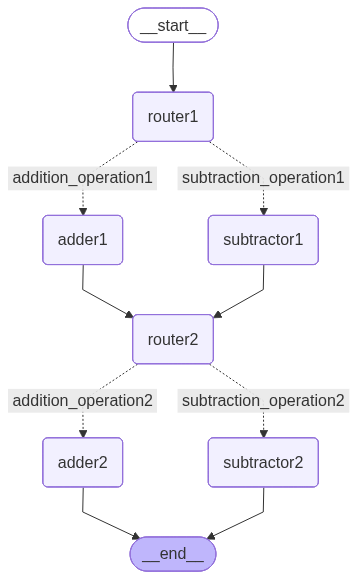

In [11]:
graph = StateGraph(AgentState)

graph.add_node("adder1", adder1)
graph.add_node("adder2", adder2)
graph.add_node("subtractor1", subtractor1)
graph.add_node("subtractor2", subtractor2)
graph.add_node("router1", lambda state:state) #pass through
graph.add_node("router2", lambda state:state) #pass through

graph.add_edge(START, "router1")

graph.add_conditional_edges(
  "router1",
  router1,
  {
    #edge:node
    "addition_operation1": "adder1",
    "subtraction_operation1": "subtractor1"
  }
)

graph.add_edge("adder1", "router2")
graph.add_edge("subtractor1", "router2")

graph.add_conditional_edges(
  "router2",
  router2,
  {
    #edge:node
    "addition_operation2": "adder2",
    "subtraction_operation2": "subtractor2"
  }
)

graph.add_edge("adder2", END)
graph.add_edge("subtractor2", END)

app = graph.compile()

app

In [12]:
result = app.invoke(AgentState(num1=10,operation1="-",num2=5,num3=7,operation2="+",num4=2))
result

{'num1': 10,
 'num2': 5,
 'num3': 7,
 'num4': 2,
 'operation1': '-',
 'operation2': '+',
 'out1': 5,
 'out2': 9}